In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 6)

/home/repos/venv/trickycases/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [28]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [4]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

## Bar Plot

<BarContainer object of 31 artists>

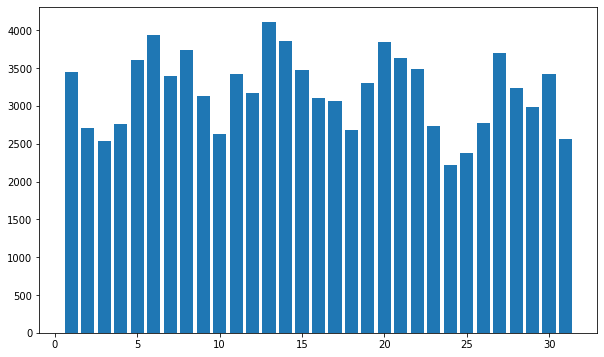

In [5]:
df['day'] = pd.to_datetime(df['dropoff']).dt.day
df['total_bill'] = df['fare'] + df['tip'] + df['tolls']

temp = df.groupby('day')['total_bill'].sum().reset_index()

plt.bar(temp['day'], temp['total_bill'])

<AxesSubplot:xlabel='day'>

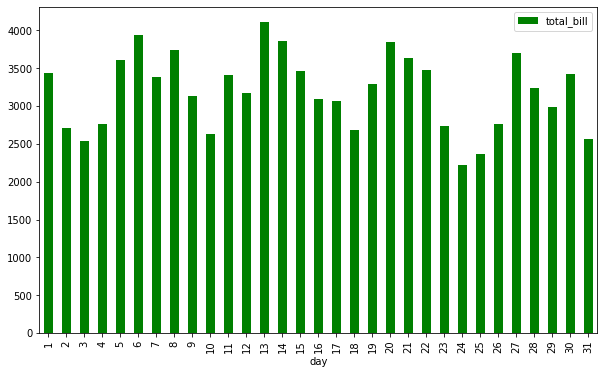

In [6]:
temp.plot(
    kind='bar',
    x='day',
    y='total_bill',
    color='green',
)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

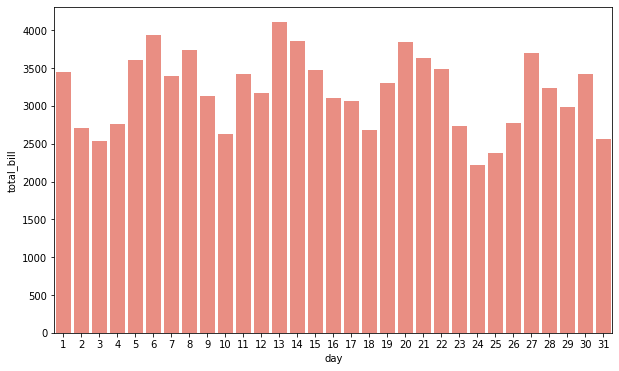

In [7]:
sns.barplot(
    x='day',
    y='total_bill',
    data=temp,
    color='salmon',
)

## Stacked Bar Plot

In [8]:
grouped_data = df.tail(30).groupby('dropoff')['fare', 'tip', 'tolls'].sum()

stacked_data = grouped_data.reset_index().melt(
    id_vars='dropoff', value_vars=['fare', 'tip', 'tolls'], var_name='category', value_name='amount')

/home/repos/venv/trickycases/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


/home/repos/venv/trickycases/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


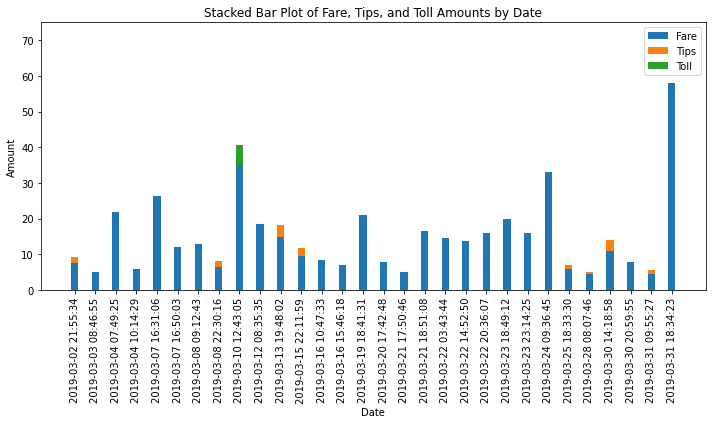

In [9]:
# Group the data by date and calculate the sum of fare, tips, and toll amounts for each date
grouped_data = df.tail(30).groupby('dropoff')['fare', 'tip', 'tolls'].sum()

# Create a list of the data for each category
fare_data = grouped_data['fare']
tips_data = grouped_data['tip']
toll_data = grouped_data['tolls']

# Create a list of dates
dates = grouped_data.index

# Set the positions of the bars on the x-axis
bar_width = 0.35
index = np.arange(len(dates))

# Create the stacked bar plot
plt.bar(index, fare_data, width=bar_width, label='Fare')
plt.bar(index, tips_data, width=bar_width, label='Tips', bottom=fare_data)
plt.bar(index, toll_data, width=bar_width, label='Toll', bottom=fare_data+tips_data)

# Set the x-axis ticks and labels
plt.xticks(index, dates, rotation=90)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Stacked Bar Plot of Fare, Tips, and Toll Amounts by Date')
plt.legend()
plt.ylim((0, 75))

# Show the plot
plt.tight_layout()
plt.show()


/home/repos/venv/trickycases/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


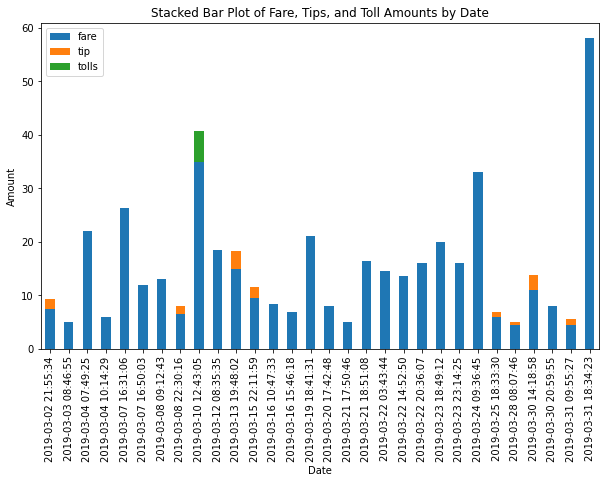

In [10]:
# Stacked barplot in pandas

grouped_data = df.tail(30).groupby('dropoff')['fare', 'tip', 'tolls'].sum()

# Create the stacked bar plot using pandas plot API
ax = grouped_data.plot(kind='bar', stacked=True)

# Set the x-axis label
ax.set_xlabel('Date')

# Set the y-axis label
ax.set_ylabel('Amount')

# Set the title
ax.set_title('Stacked Bar Plot of Fare, Tips, and Toll Amounts by Date')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

/home/repos/venv/trickycases/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


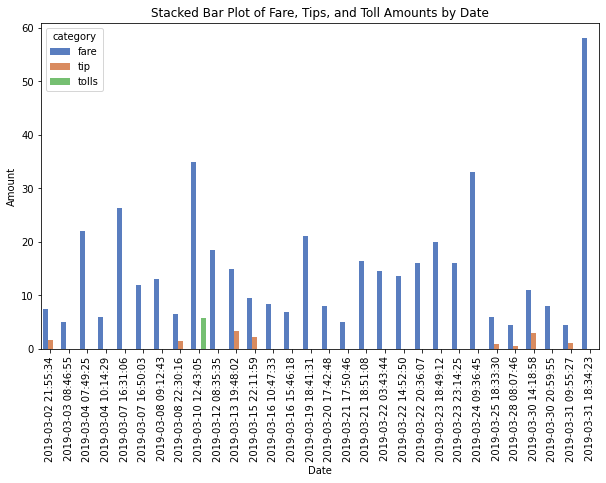

In [11]:
# Group the data by date and calculate the sum of fare, tips, and toll amounts for each date
grouped_data = df.tail(30).groupby('dropoff')['fare', 'tip', 'tolls'].sum().reset_index()

# Reshape the data to a stacked format
stacked_data = grouped_data.melt(id_vars='dropoff', var_name='category', value_name='amount')

# Create the stacked bar plot using Seaborn
sns.barplot(x='dropoff', y='amount', hue='category', data=stacked_data, palette='muted')

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Amount')

# Set the title
plt.title('Stacked Bar Plot of Fare, Tips, and Toll Amounts by Date')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()



## Histograms (Univariate)

(array([  96.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4678.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         876.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  243.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  110.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  277.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  153.]),
 array([0.        , 0.10714286, 0.21428571, 0.32142857, 0.42857143,
        0.53571429, 0.64285714, 0.75      , 0.85714286, 0.96428571,
        1.07142857, 1.17857143, 1.28571429, 1.39285714, 1.5       ,
        1.60714286, 1.71428571, 1.82142857, 1.92857143, 2.03571429,
        2.14285714, 2.25      , 2.35714286, 2.46428571, 2.57142857,
        2.67857143, 2.78571429, 2.89285714, 3.        , 3.10714286,
        3.21428571, 3.32142857, 3.42857143, 3.53571429, 3.64285714,
        3.75      , 3.85714286, 3.96428571, 4.07142857, 4.17857143,
      

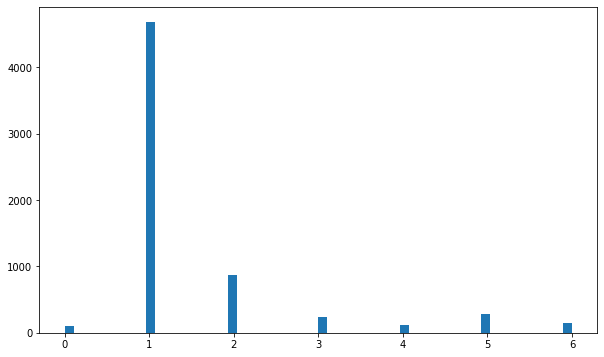

In [12]:
data = df['passengers'].value_counts(normalize=True)

plt.hist(
    df['passengers'],
    bins='auto'
)

<AxesSubplot:ylabel='Frequency'>

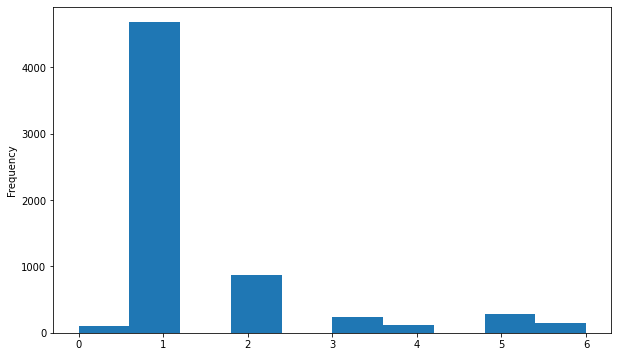

In [13]:
df['passengers'].plot(
    kind='hist'
)

<AxesSubplot:xlabel='passengers', ylabel='Count'>

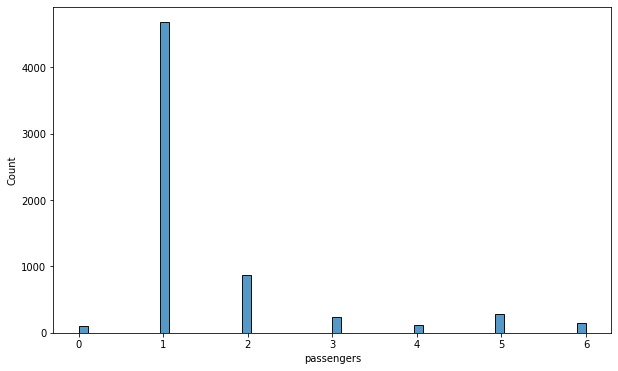

In [14]:
sns.histplot(
    x = 'passengers',
    data = df
)

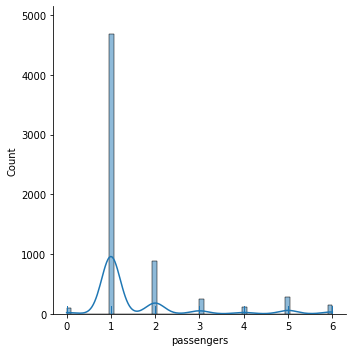

In [15]:
sns.displot(
    x = df['passengers'],
    kde=True,
    rug=True
)

## Scatterplots

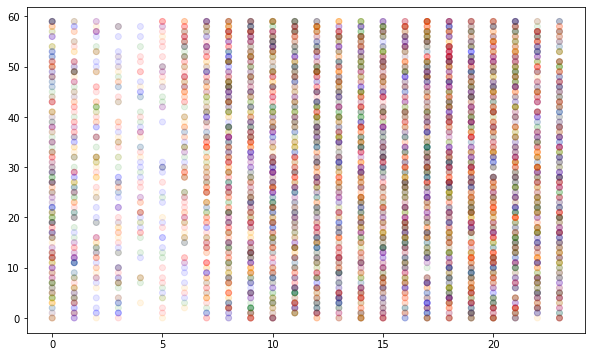

In [16]:
df['hour_of_day'] = pd.to_datetime(df['dropoff']).dt.hour
df['minute_of_hour'] = pd.to_datetime(df['dropoff']).dt.minute

df['value_group_quantile'] = pd.qcut(
    df['fare'],
    q=4,
    labels=['low', 'medium', 'high', 'very high']
)

palette = {
    'low': 'red',
    'medium': 'orange',
    'high': 'green',
    'very high': 'blue'
}

plt.scatter(
    df['hour_of_day'],
    df['minute_of_hour'],
    c=df['value_group_quantile'].map(palette),
    alpha=0.1
)

<AxesSubplot:xlabel='hour_of_day', ylabel='minute_of_hour'>

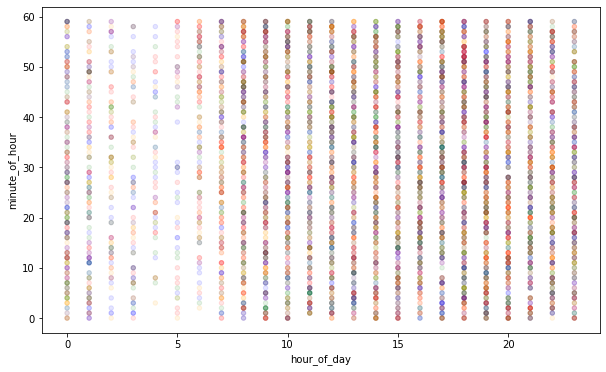

In [17]:
df[['hour_of_day', 'minute_of_hour']].plot(
    kind='scatter',
    x='hour_of_day',
    y='minute_of_hour',
    alpha=0.1,
    c=df['value_group_quantile'].map(palette)
)

<AxesSubplot:xlabel='hour_of_day', ylabel='minute_of_hour'>

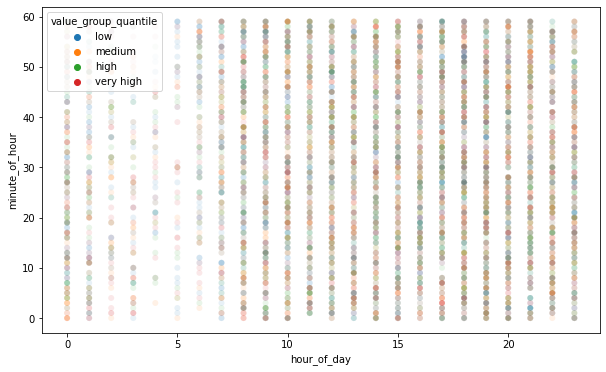

In [18]:
sns.scatterplot(
    x='hour_of_day',
    y='minute_of_hour',
    data=df,
    hue='value_group_quantile',
    alpha=0.1
)

## Line Plots

/home/repos/venv/trickycases/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


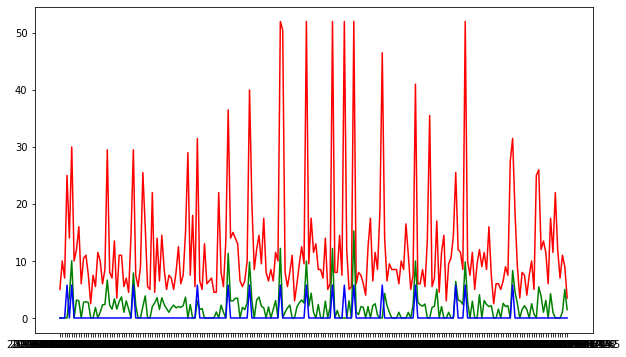

In [19]:
grouped_data = df.groupby('dropoff')['fare', 'tip', 'tolls'].sum().iloc[::30, :]

plt.plot(
    grouped_data.index,
    grouped_data['fare'],
    label='Fare',
    color='red'
)

plt.plot(
    grouped_data.index,
    grouped_data['tip'],
    label='Tip',
    color='green'
)

plt.plot(
    grouped_data.index,
    grouped_data['tolls'],
    label='Toll',
    color='blue'
)

<AxesSubplot:xlabel='dropoff'>

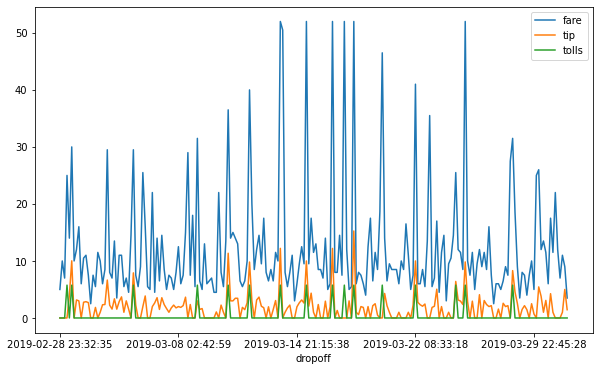

In [20]:
grouped_data.plot(
    kind='line',
    y=['fare', 'tip', 'tolls']
)

<AxesSubplot:xlabel='dropoff'>

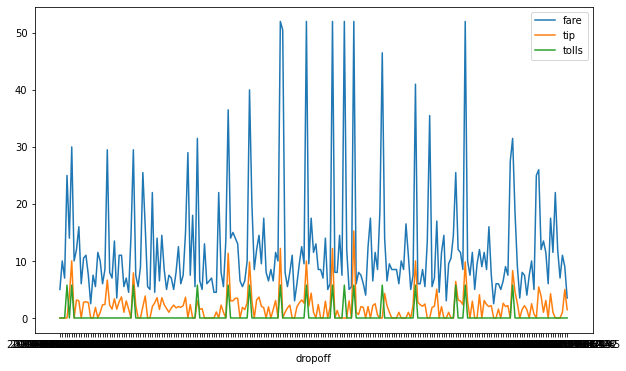

In [21]:
sns.lineplot(
    data=grouped_data,
    palette='tab10',
    dashes=False
)

## Advanced Seaborn

<AxesSubplot:xlabel='day', ylabel='total_bill'>

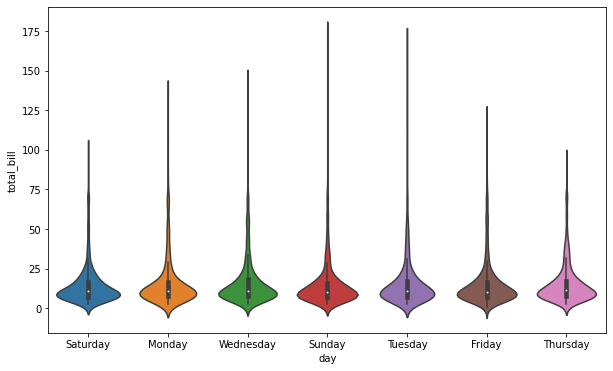

In [31]:
df['day'] = pd.to_datetime(df['dropoff']).dt.day_name()
df['total_bill'] = df['fare'] + df['tip'] + df['tolls']

sns.violinplot(
    x='day',
    y='total_bill',
    data=df
)

<AxesSubplot:>

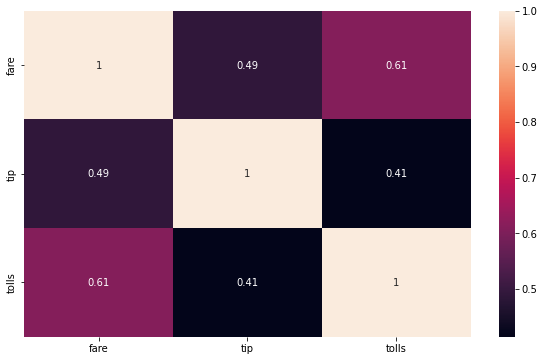

In [32]:
sns.heatmap(
    df[['fare', 'tip', 'tolls']].corr(),
    annot=True
)

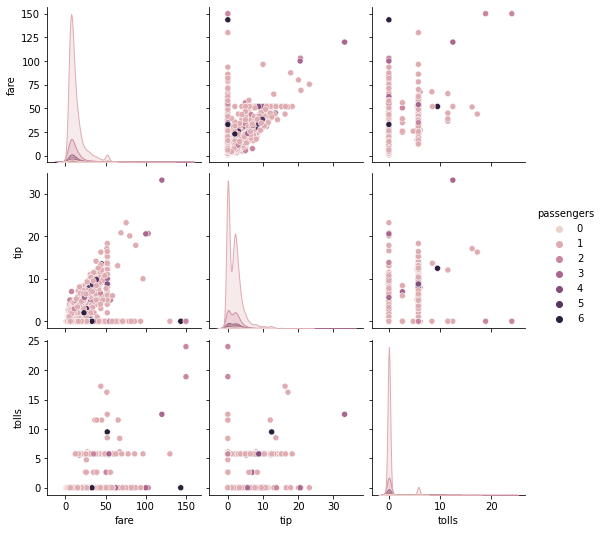

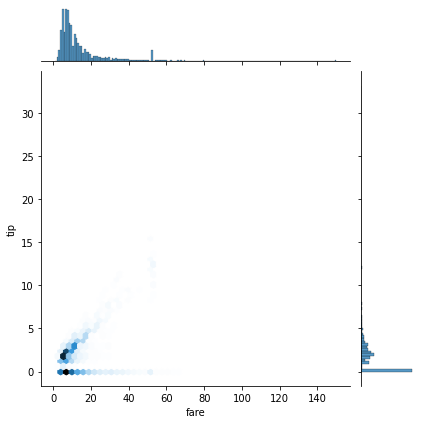

In [33]:
sns.pairplot(
    df[['fare', 'tip', 'tolls', 'passengers']],
    hue='passengers'
)

sns.jointplot(
    x='fare',
    y='tip',
    data=df,
    kind='hex'
)

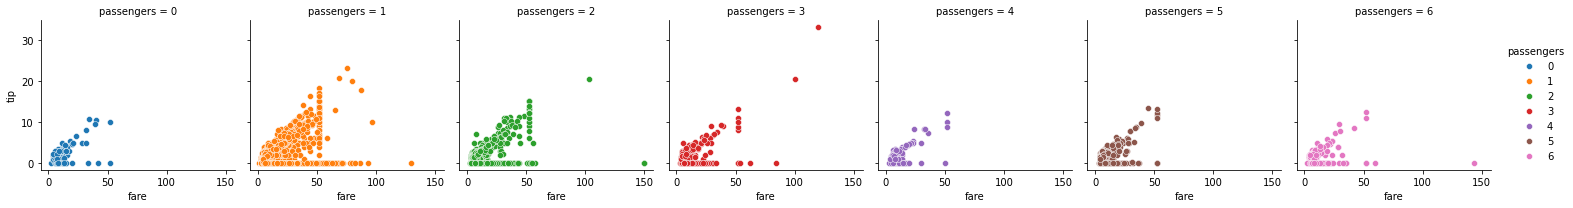

In [34]:
sns.FacetGrid(
    df,
    col='passengers',
    hue='passengers'
).map(
    sns.scatterplot,
    'fare',
    'tip'
).add_legend()

## Customizing

[*********************100%***********************]  1 of 1 completed

findfont: Font family ['Oswald'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Oswald'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Oswald'] not found. Falling back to DejaVu Sans.


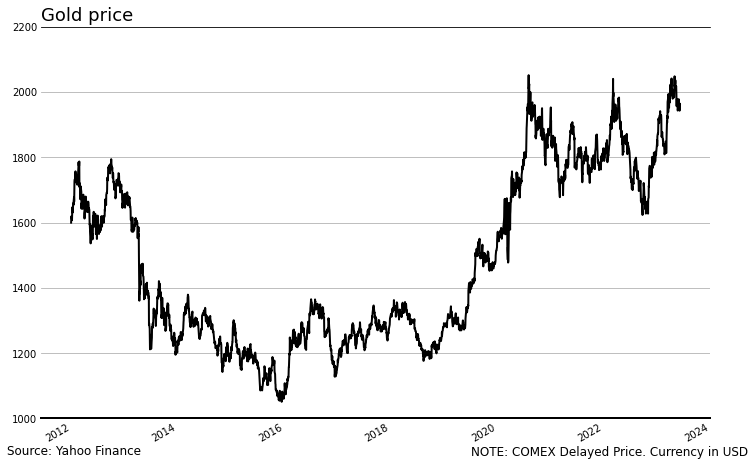

In [23]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

import yfinance as yf
import pandas as pd

# Adding custom font
font_dir = ['/mnt/c/Users/username/Downloads/Oswald']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
plt.rcParams['font.family'] = 'Oswald'

# Loading data from yfinance
df = yf.download('GC=F', start = '2012-01-01')
y = df['Close']

# Basic lineplot using pandas built-in method
ax = y.plot(kind='line', grid = True, color = 'black', figsize = (12, 8), linewidth=2)

# Hide X label if it is obvious
ax.set_xlabel('')

# Grid only shown in the horizontal direction
ax.grid(axis='x')

# Coordinates for additional text on the corners of the plot
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

ax.text(left - 0.3, bottom - 0.35, 'Source: Yahoo Finance',
        horizontalalignment='left',
        verticalalignment='bottom',
        fontsize = 12,
        transform=ax.transAxes)

ax.text(right + 0.1, bottom - 0.32, 'NOTE: COMEX Delayed Price. Currency in USD',
        horizontalalignment='center',
        verticalalignment='top',
        fontsize = 12,
        transform=ax.transAxes)

# Set limits for Y-axis
ax.set_ylim(ymin=1000, ymax=2200)

# Remove small non-important details like spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)

# Ticks should be removed## as well
ax.tick_params(axis=u'both', which=u'both', length = 0)

# Finally, show title
plt.title('Gold price', loc = 'left', fontsize=18)

plt.show()